<a href="https://colab.research.google.com/github/chichvarin/ML-Classification-Bank-Marketing/blob/main/Project_BankDeposit_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-Classification-Project: Bank Deposit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
import re as re
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split  
from sklearn.feature_selection import SelectKBest, f_classif

## Column Names and Descriptions for Data Set
**Bank customer data:**
*   age
*   job (field of employment)
*   marital (marital status)
*   education (level of education)
*   default (whether there is an overdue loan)
*   housing (whether there is a loan for housing)
*   loan (whether there is a loan for personal needs)
*   balance

**Data related to the last contact in the context of the current marketing campaign:**
*   contact (type of contact with the client)
*   month (the month in which the last contact was made)
*   day (the day the last contact was made)
*   duration (contact duration in seconds)

**Other features:**
*   campaign (number of contacts with this client during the current campaign)
*   pdays (the number of days missed from the last marketing campaign to the contact in the current campaign)
*   previous (number of contacts before the current campaign)
*   poutcome (the result of a past marketing campaign)
*   deposit (target variable, which determines whether the client agrees to open a deposit with the bank - what we will try to predict in this case)

## Part 1. Primary data processing - Data Cleaning

Let's start by evaluating how ready the proposed data are for further analysis. First of all, let's find out if there are missing values ​​(empty, unfilled cells) in the data.

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('bank_fin.csv', sep = ';')

Saving bank_fin.csv to bank_fin.csv


In [3]:
# load dataset
# df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [5]:
# check missing values
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Balance

In [6]:
# transform the balance feature so that it is correctly read as a float

In [7]:
df['balance'] = df['balance'].replace(to_replace =('[$]', ' ', ',00'), value = '', regex = True).astype(float)
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [8]:
# replace missing values with median values ​​for this feature

In [9]:
df['balance'] = df['balance'].fillna(df['balance'].median())

### Job / Education

In [10]:
# fill in gaps in categorical features with moda

In [11]:
df['job'].replace({"unknown":np.nan}, inplace=True)
df['education'].replace({"unknown":np.nan}, inplace=True)

In [12]:
df['job'] = df['job'].fillna(df['job'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [13]:
df['job'].value_counts()

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [14]:
df['education'].value_counts()

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [15]:
round(df[(df.job == 'management')&
        (df.education == 'secondary')].balance.mean(), 3)

1598.883

### Outliers

In [16]:
# remove all outliers for the balance feature

In [17]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [18]:
df['balance'].describe()

count    11162.000000
mean      1526.936033
std       3224.829691
min      -6847.000000
25%        123.000000
50%        550.000000
75%       1699.000000
max      81204.000000
Name: balance, dtype: float64

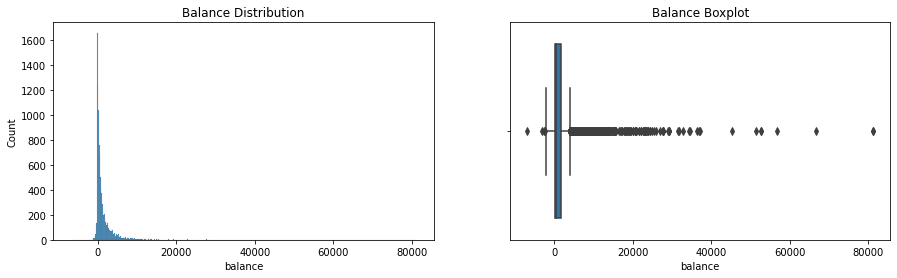

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
histplot.set_title('Balance Distribution');
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);
boxplot.set_title('Balance Boxplot');

In [20]:
outliers, cleaned = outliers_iqr(df, 'balance')
print(f'Number of outliers according to Tukeys method: {outliers.shape[0]}')
print(f'Resulting Number of Records: {cleaned.shape[0]}')
print('max outlier value: \n' + str(outliers.max()))
print('min outlier value: \n'+ str(outliers.min()))

Number of outliers according to Tukeys method: 1057
Resulting Number of Records: 10104
max outlier value: 
age                  87
job          unemployed
marital          single
education      tertiary
default             yes
balance         81204.0
housing             yes
loan                yes
contact         unknown
day                  31
month               sep
duration           2372
campaign             63
pdays               761
previous             40
poutcome        unknown
deposit             yes
dtype: object
min outlier value: 
age                20
job            admin.
marital      divorced
education     primary
default            no
balance       -6847.0
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            5
campaign            1
pdays              -1
previous            0
poutcome      failure
deposit            no
dtype: object


In [21]:
lower_limit = df['balance'].quantile(0.25) - (df['balance'].quantile(0.75)-df['balance'].quantile(0.25))*1.5
upper_limit = df['balance'].quantile(0.75) + (df['balance'].quantile(0.75)-df['balance'].quantile(0.25))*1.5

print(f'Lower bound value: {lower_limit}')
print(f'Upper bound value: {upper_limit}')

Lower bound value: -2241.0
Upper bound value: 4063.0


In [22]:
df.shape

(11162, 17)

In [23]:
df = df[(df['balance'] <= upper_limit) & 
            (df['balance'] >= lower_limit)
           ]
df.shape

(10105, 17)

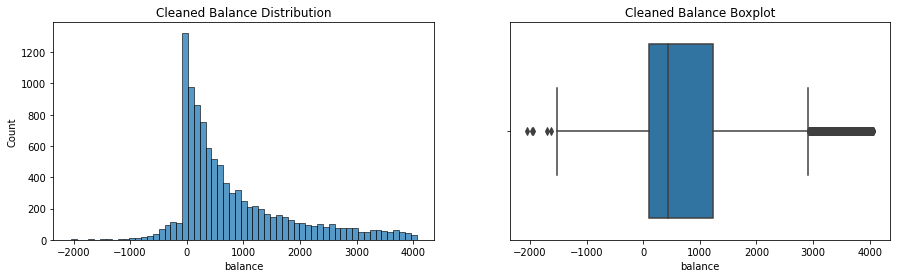

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='balance', ax=axes[0]);
histplot.set_title('Cleaned Balance Distribution');
boxplot = sns.boxplot(data=cleaned, x='balance', ax=axes[1]);
boxplot.set_title('Cleaned Balance Boxplot');

In [25]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [26]:
outliers, cleaned = outliers_z_score(df, 'balance', log_scale=True)
print(f'Number of outliers by z-score: {outliers.shape[0]}')
print(f'Resulting Number of Records: {cleaned.shape[0]}')

Number of outliers by z-score: 0
Resulting Number of Records: 0


## Part 2. Exploratory Data Analysis


### Class Imbalance

In [27]:
# analysis of the ratio of classes in the data for imbalance

In [28]:
df['deposit'].value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

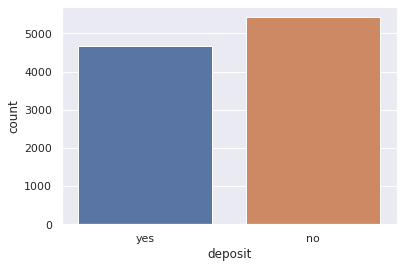

In [29]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="deposit", data=df)

### Descriptive statistics for scale variables

In [30]:
# calculation of descriptive statistics for scale variables

In [31]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Descriptive statistics for categorical variables

In [32]:
# calculation of descriptive statistics for categorical variables

In [33]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


### Poutcome

In [34]:
# below we see for which status of the previous marketing campaign success in the current one prevails over the number of failures

In [35]:
df.groupby(['poutcome'])['deposit'].value_counts()

poutcome  deposit
failure   no          562
          yes         547
other     yes         265
          no          216
success   yes         861
          no           84
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

### Month

In [36]:
# in may the offer to open a deposit was most often refused

In [37]:
df.groupby(df['deposit'])['month'].value_counts()

deposit  month
no       may      1776
         jul       836
         aug       775
         jun       606
         nov       456
         feb       323
         apr       317
         jan       194
         oct        62
         sep        46
         mar        24
         dec         9
yes      may       841
         aug       610
         jul       582
         apr       513
         jun       498
         feb       386
         nov       324
         oct       273
         sep       232
         mar       213
         jan       125
         dec        84
Name: month, dtype: int64

### Age

In [38]:
# in "60+" and "<30" groups are more likely to open a deposit than to refuse an offer

In [39]:
def age_rule(age):
    if age < 30:
         return '<30'
    if  30 <= age <= 40:
         return '30-40'
    if  40 <= age <= 50:
         return '40-50'
    if  50 <= age <= 60:
         return '50-60'
    if age > 60:
         return '60+'

In [40]:
df1 = df.copy()
df1['age'] = df1.apply(lambda x: age_rule(x['age']), axis =  1)

In [41]:
df1.groupby(['age', 'deposit']).size().unstack().fillna(0)

deposit,no,yes
age,,
30-40,2440,1817
40-50,1360,895
50-60,933,692
60+,97,416
<30,594,861


### Visualization

In [42]:
types = df.dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [43]:
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

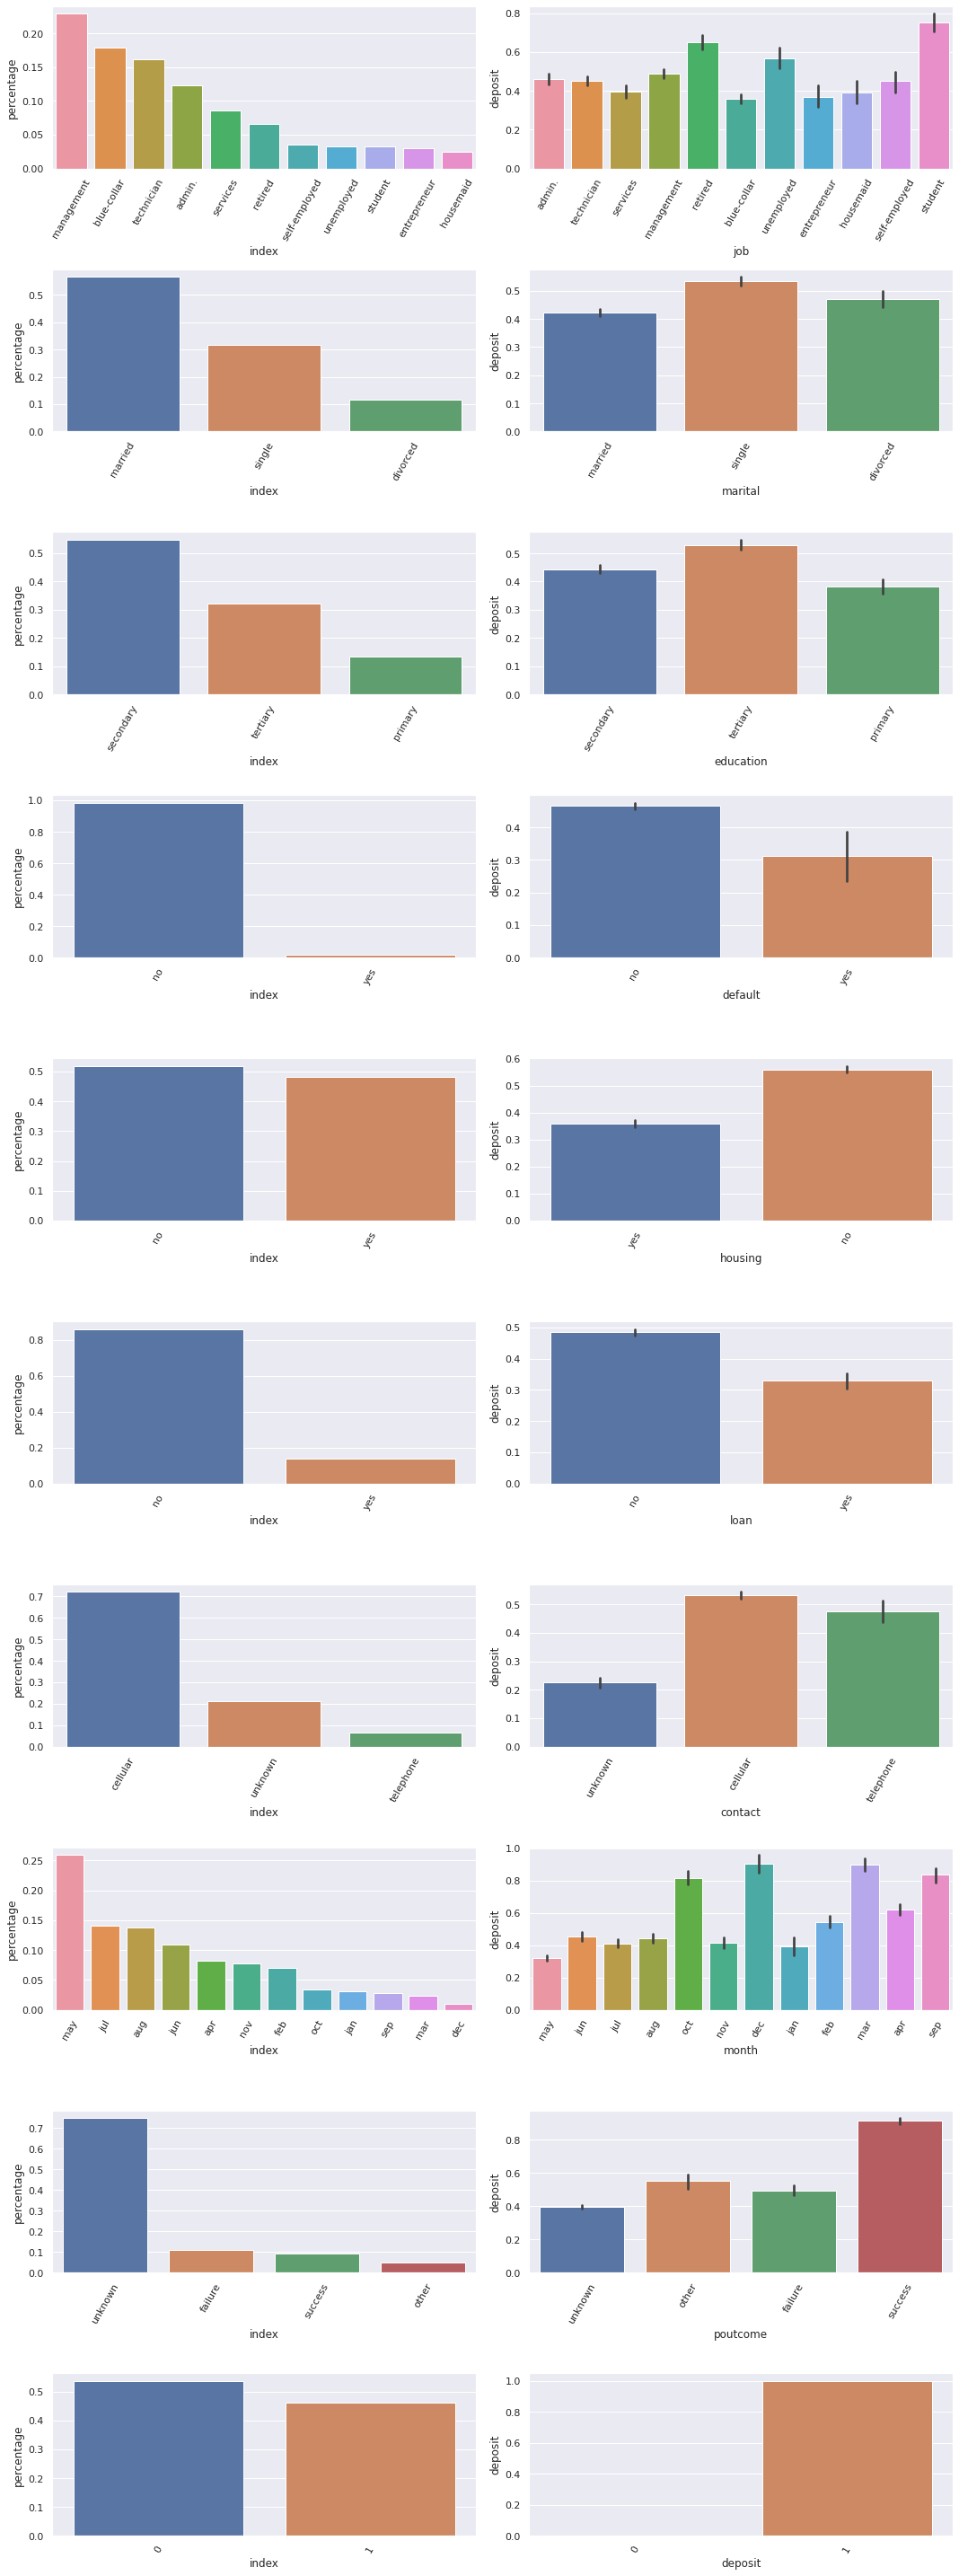

In [44]:
n = len(cat_features) #number of categorical features
fig, axes = plt.subplots(n, 2, figsize=(15, 40)) #figure+n*2 coordinate planes
#Create a cycle for all features from the list of categorical features
for i, feature in enumerate(cat_features):
    #build a quantitative column for the share ratio of each of the categories in the data
    count_data = (df[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percentage')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x='index', y='percentage', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=60)
    #build a bar chart of the proportion of people earning >50K (average for the income column) depending on the category
    mean_barplot = sns.barplot(data=df, x=feature, y='deposit', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=60)
plt.tight_layout() #graph alignment

In [45]:
yes_pvt = df.loc[df['deposit'].isin([1])].pivot_table(values=['deposit'],
index=['education'],
columns=['marital'],
aggfunc='count',
margins=True)                                                                                                           
display(yes_pvt)

deposit                     
marital   divorced married single   All
education                              
primary         96     339     82   517
secondary      283    1289    879  2451
tertiary       174     784    755  1713
All            553    2412   1716  4681

In [46]:
no_pvt = df.loc[df['deposit'].isin([0])].pivot_table(values=['deposit'],
index=['education'],
columns=['marital'],
aggfunc='count',
margins=True)                                                                                                           
display(no_pvt)

deposit                     
marital   divorced married single   All
education                              
primary         91     641    100   832
secondary      370    1830    866  3066
tertiary       163     832    531  1526
All            624    3303   1497  5424

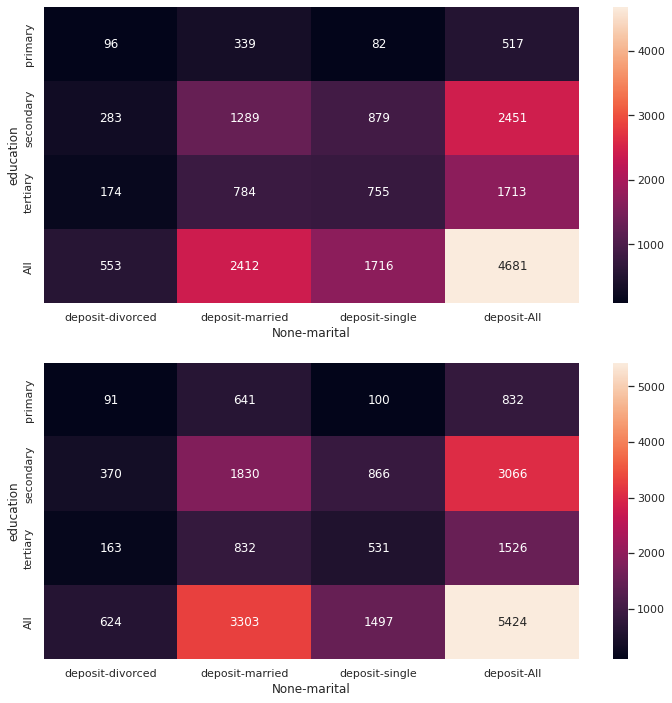

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))
sns.heatmap(yes_pvt, ax=ax1, annot=True, fmt ='.5g')
sns.heatmap(no_pvt, ax=ax2, annot=True, fmt ='.5g')

plt.show()

## Part 3. Feature Engineering - Selection and transformation of features

### Education

In [48]:
# transforming levels of education

In [49]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['education_cat'] = labelencoder.fit_transform(df['education'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,education_cat
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,1
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,1,1
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,1
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,1,1
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,0,0
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,0,1
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,0,1
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,0,1


In [50]:
df['education_cat'].sum()

11995

### Dummy Encoding

In [51]:
# creating dummy variables

In [52]:
dummies_df = pd.get_dummies(df)
dummies_df.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,education_cat,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343.0,5,1042,1,-1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
1,56,45.0,5,1467,1,-1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,1
2,41,1270.0,5,1389,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476.0,5,579,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184.0,5,673,2,-1,0,1,2,1,...,0,0,1,0,0,0,0,0,0,1


In [53]:
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10105 non-null  int64  
 1   balance              10105 non-null  float64
 2   day                  10105 non-null  int64  
 3   duration             10105 non-null  int64  
 4   campaign             10105 non-null  int64  
 5   pdays                10105 non-null  int64  
 6   previous             10105 non-null  int64  
 7   deposit              10105 non-null  int64  
 8   education_cat        10105 non-null  int64  
 9   job_admin.           10105 non-null  uint8  
 10  job_blue-collar      10105 non-null  uint8  
 11  job_entrepreneur     10105 non-null  uint8  
 12  job_housemaid        10105 non-null  uint8  
 13  job_management       10105 non-null  uint8  
 14  job_retired          10105 non-null  uint8  
 15  job_self-employed    10105 non-null 

In [54]:
round(dummies_df['housing_yes'].mean() + dummies_df['default_yes'].mean() + dummies_df['loan_yes'].mean(), 3)

0.635

In [55]:
dummies_df.shape

(10105, 51)

### Correlation

In [56]:
# correlation matrix and evaluation of data for the presence of multicollinearity

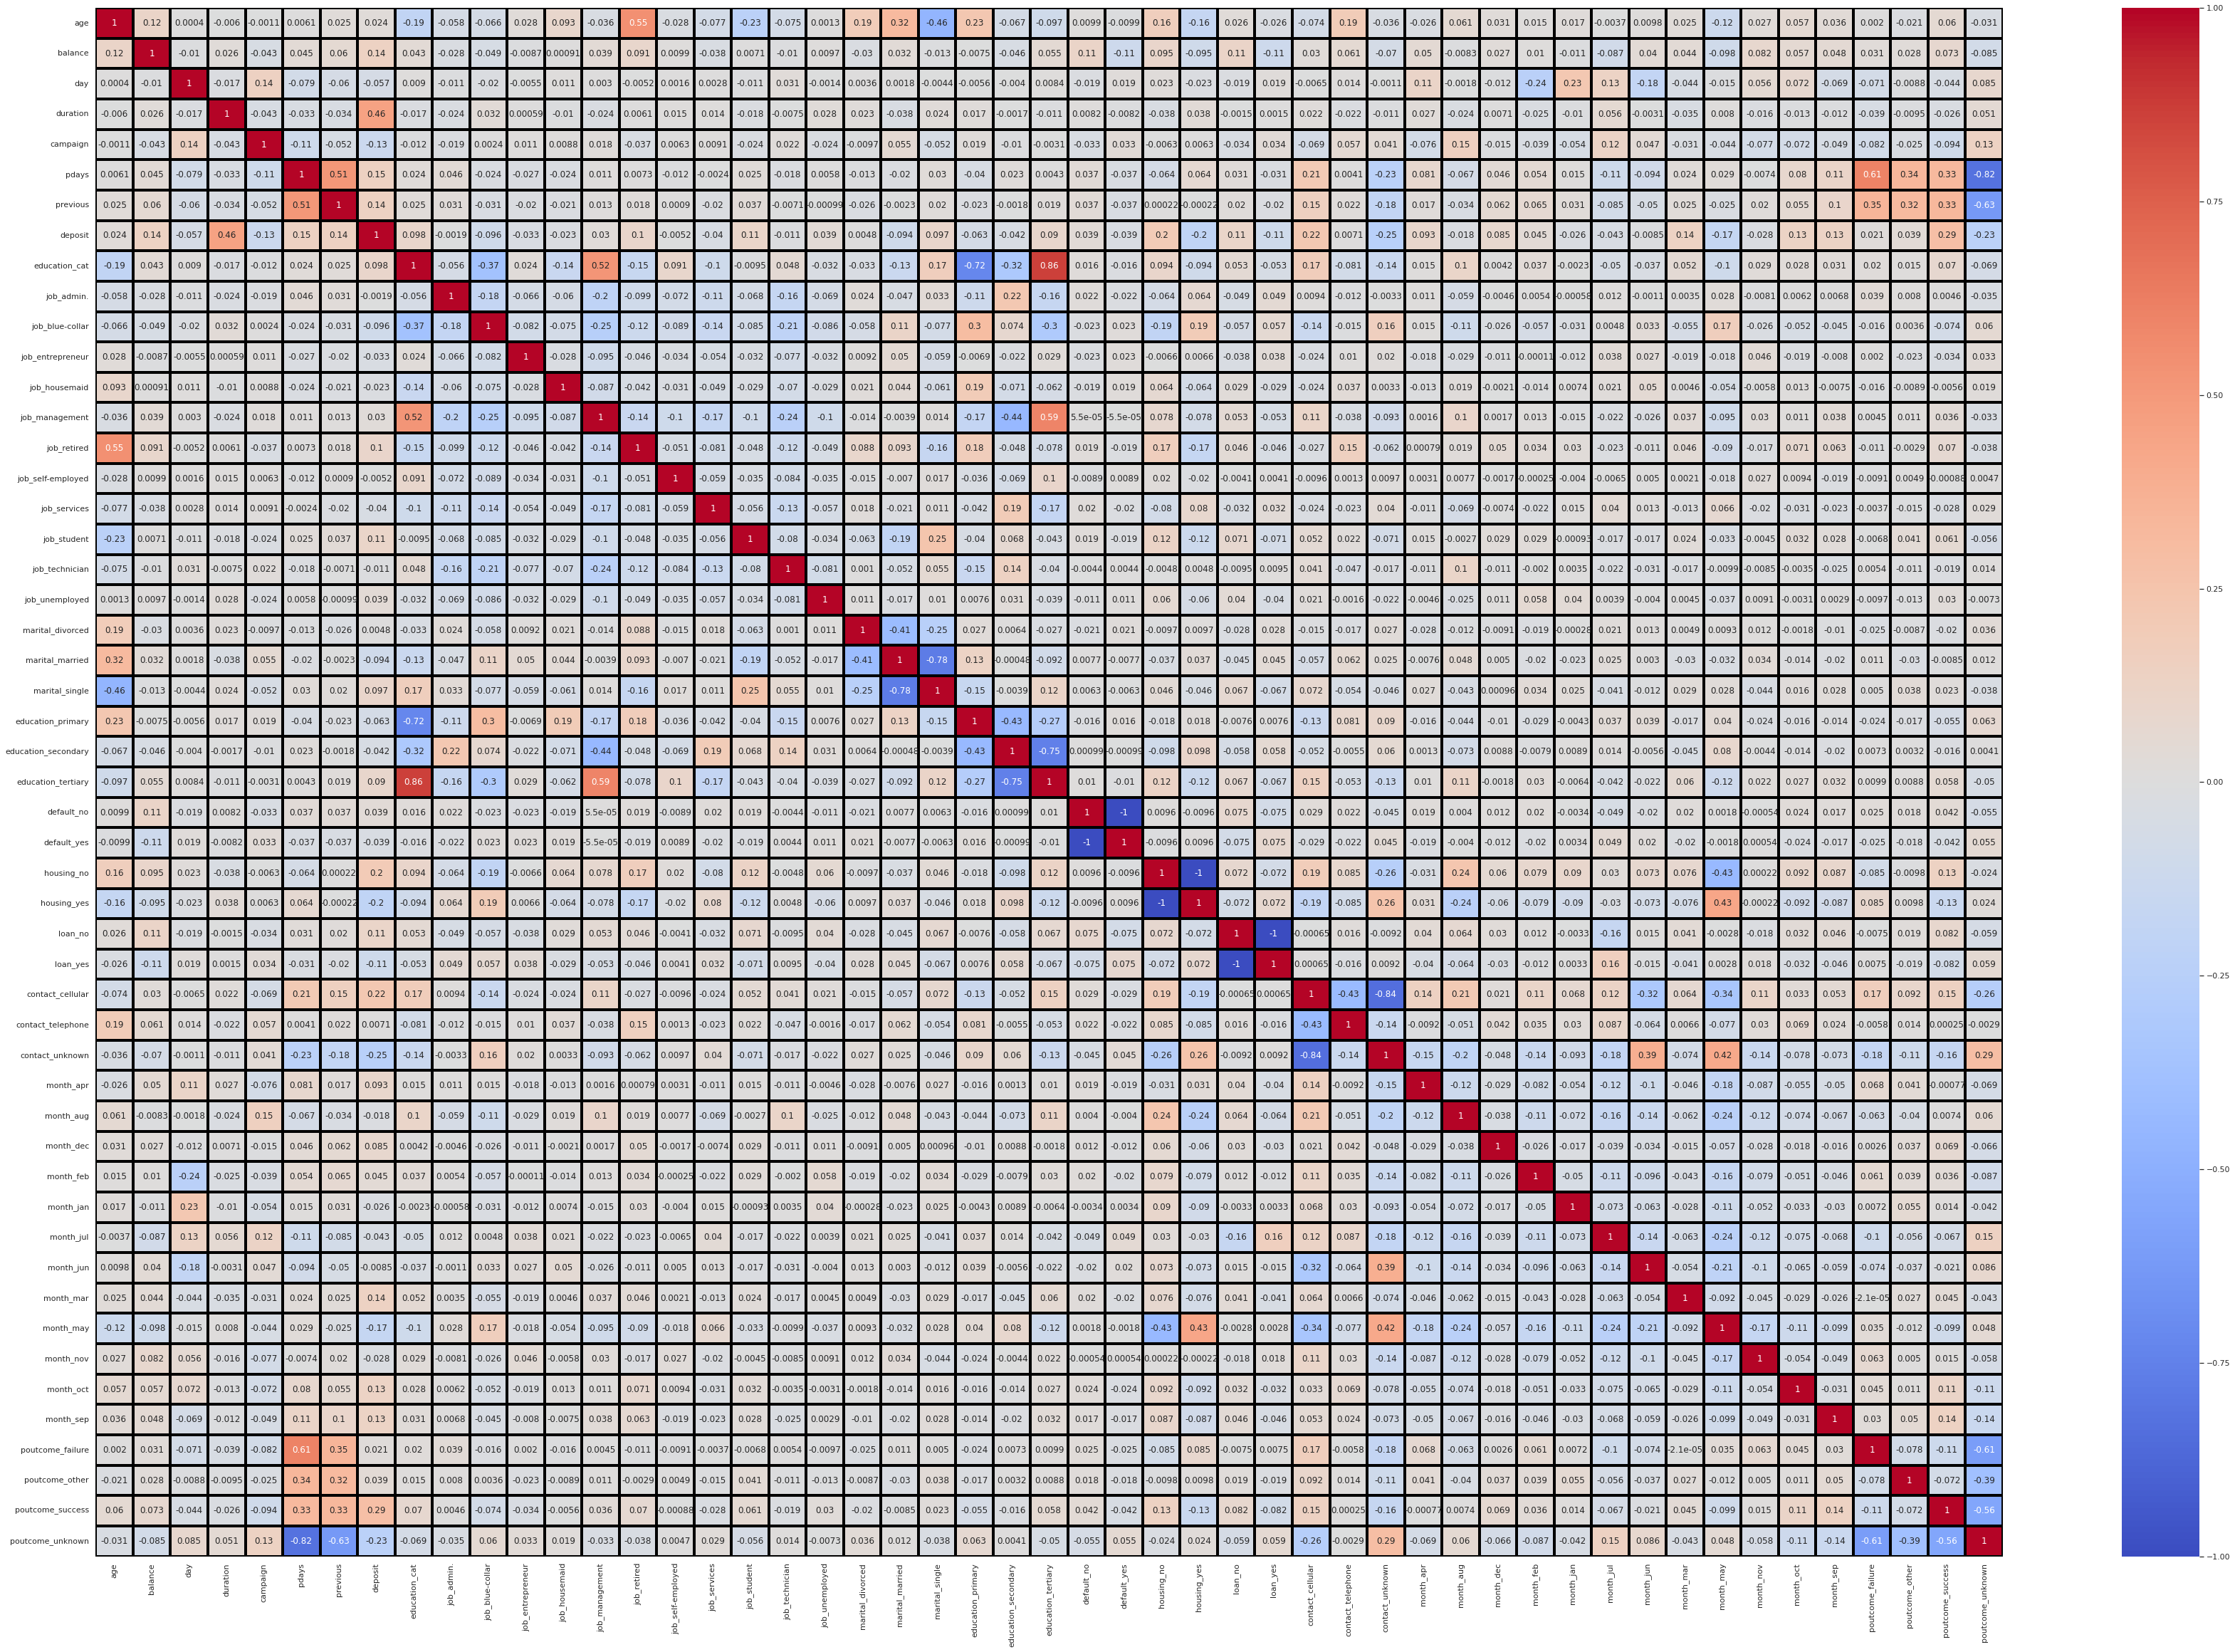

In [57]:
plt.figure(figsize = (60,40))
sns.heatmap(dummies_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

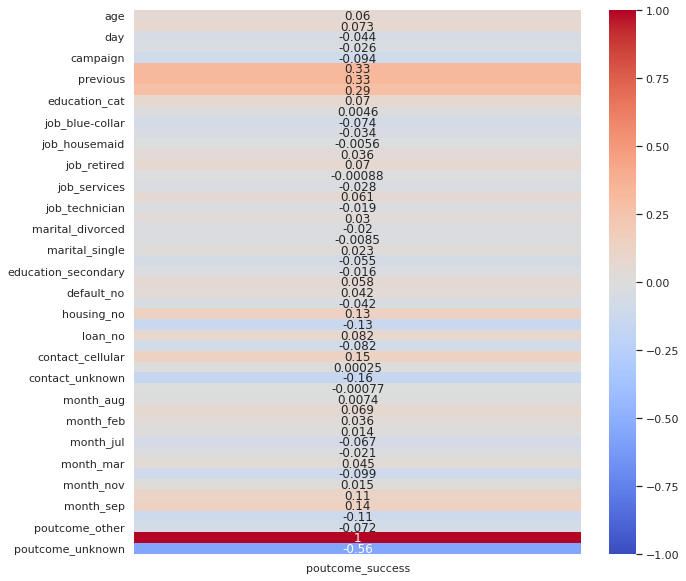

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dummies_df.corr()[['poutcome_success']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', ax=ax)

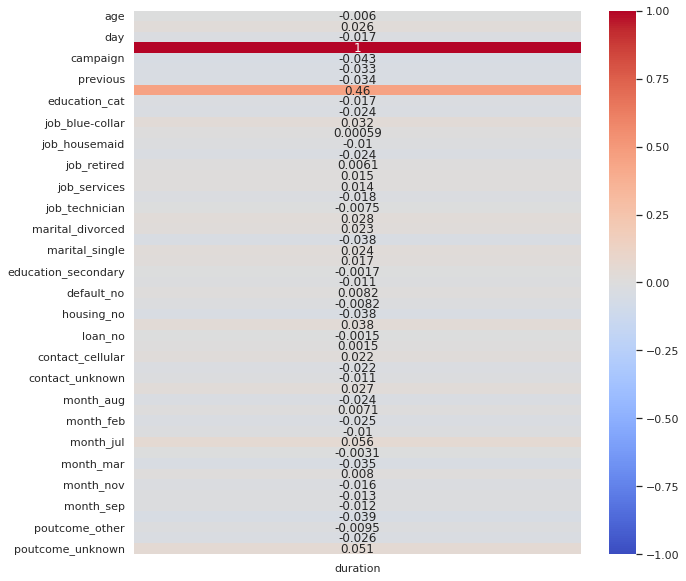

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dummies_df.corr()[['duration']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', ax=ax)

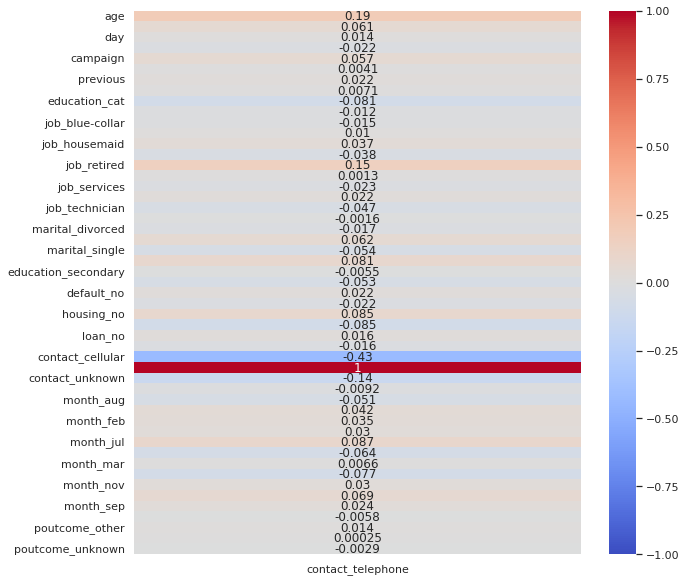

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dummies_df.corr()[['contact_telephone']], vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', ax=ax)

In [61]:
dummies_df_c = dummies_df.corr()
dummies_df_cfilter = dummies_df_c[dummies_df_c <= -0.9]

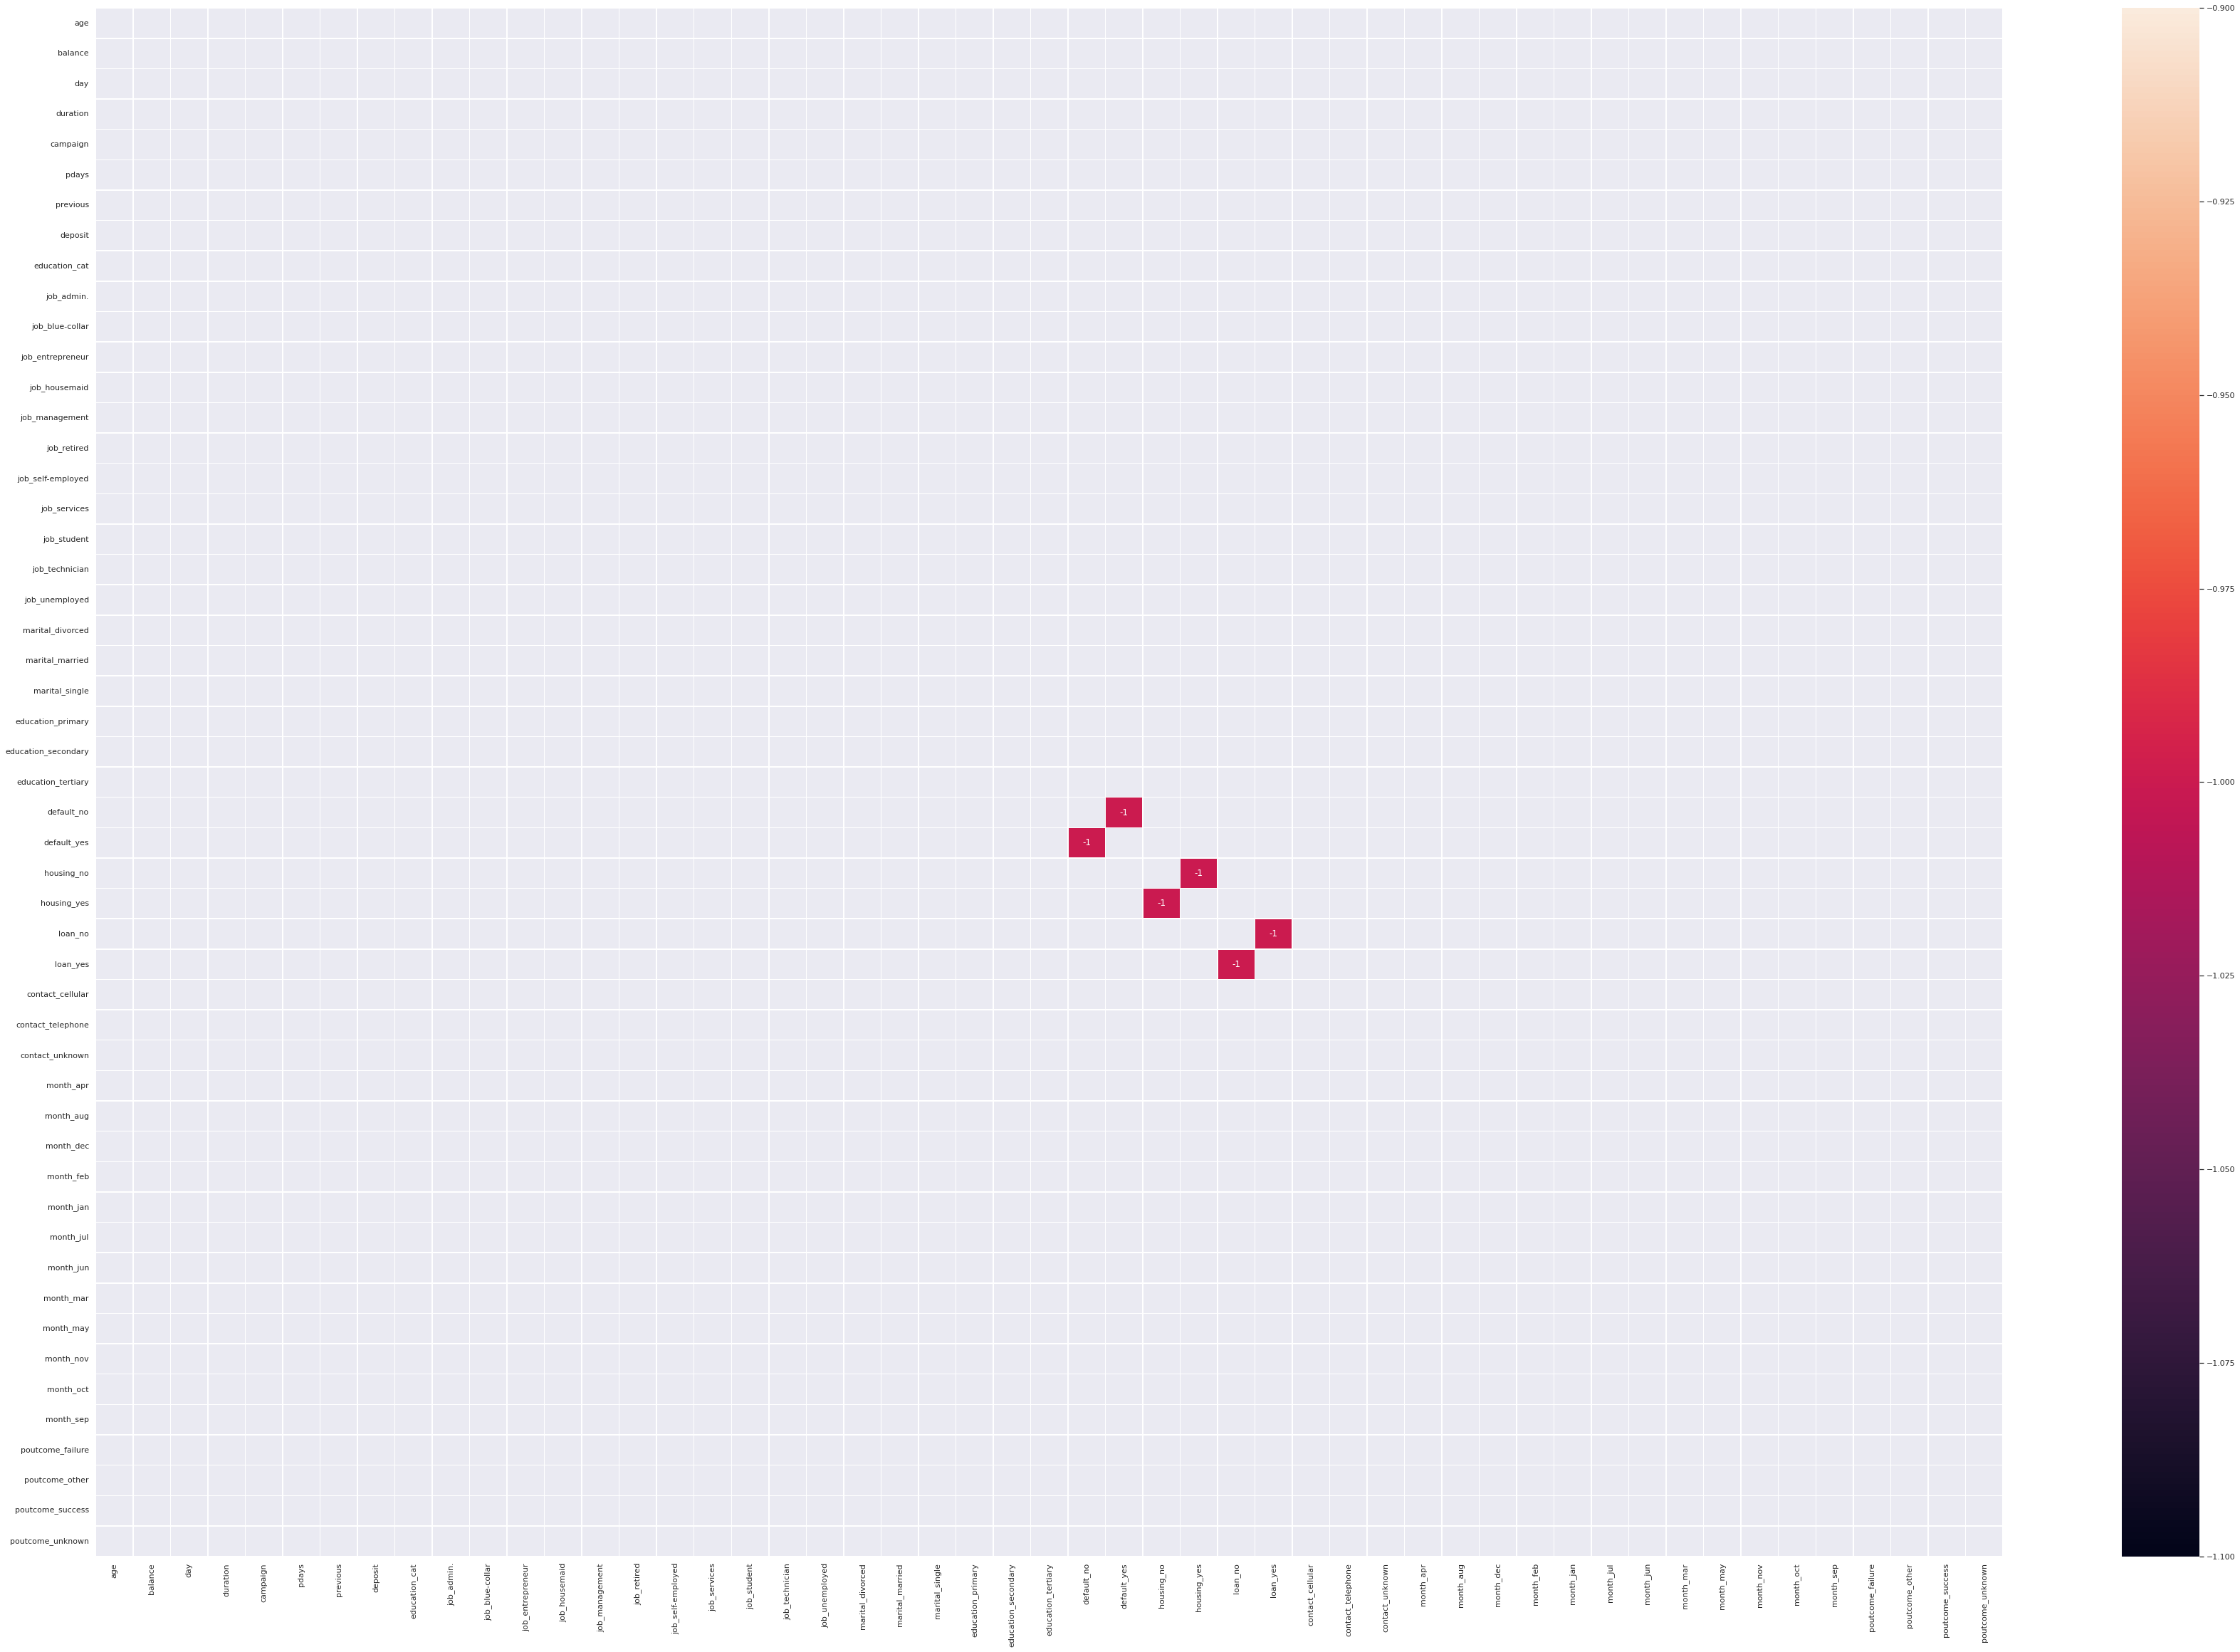

In [62]:
fig, ax = plt.subplots(figsize=(60,40))
sns.heatmap(dummies_df_cfilter, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Сorrelation coefficient')

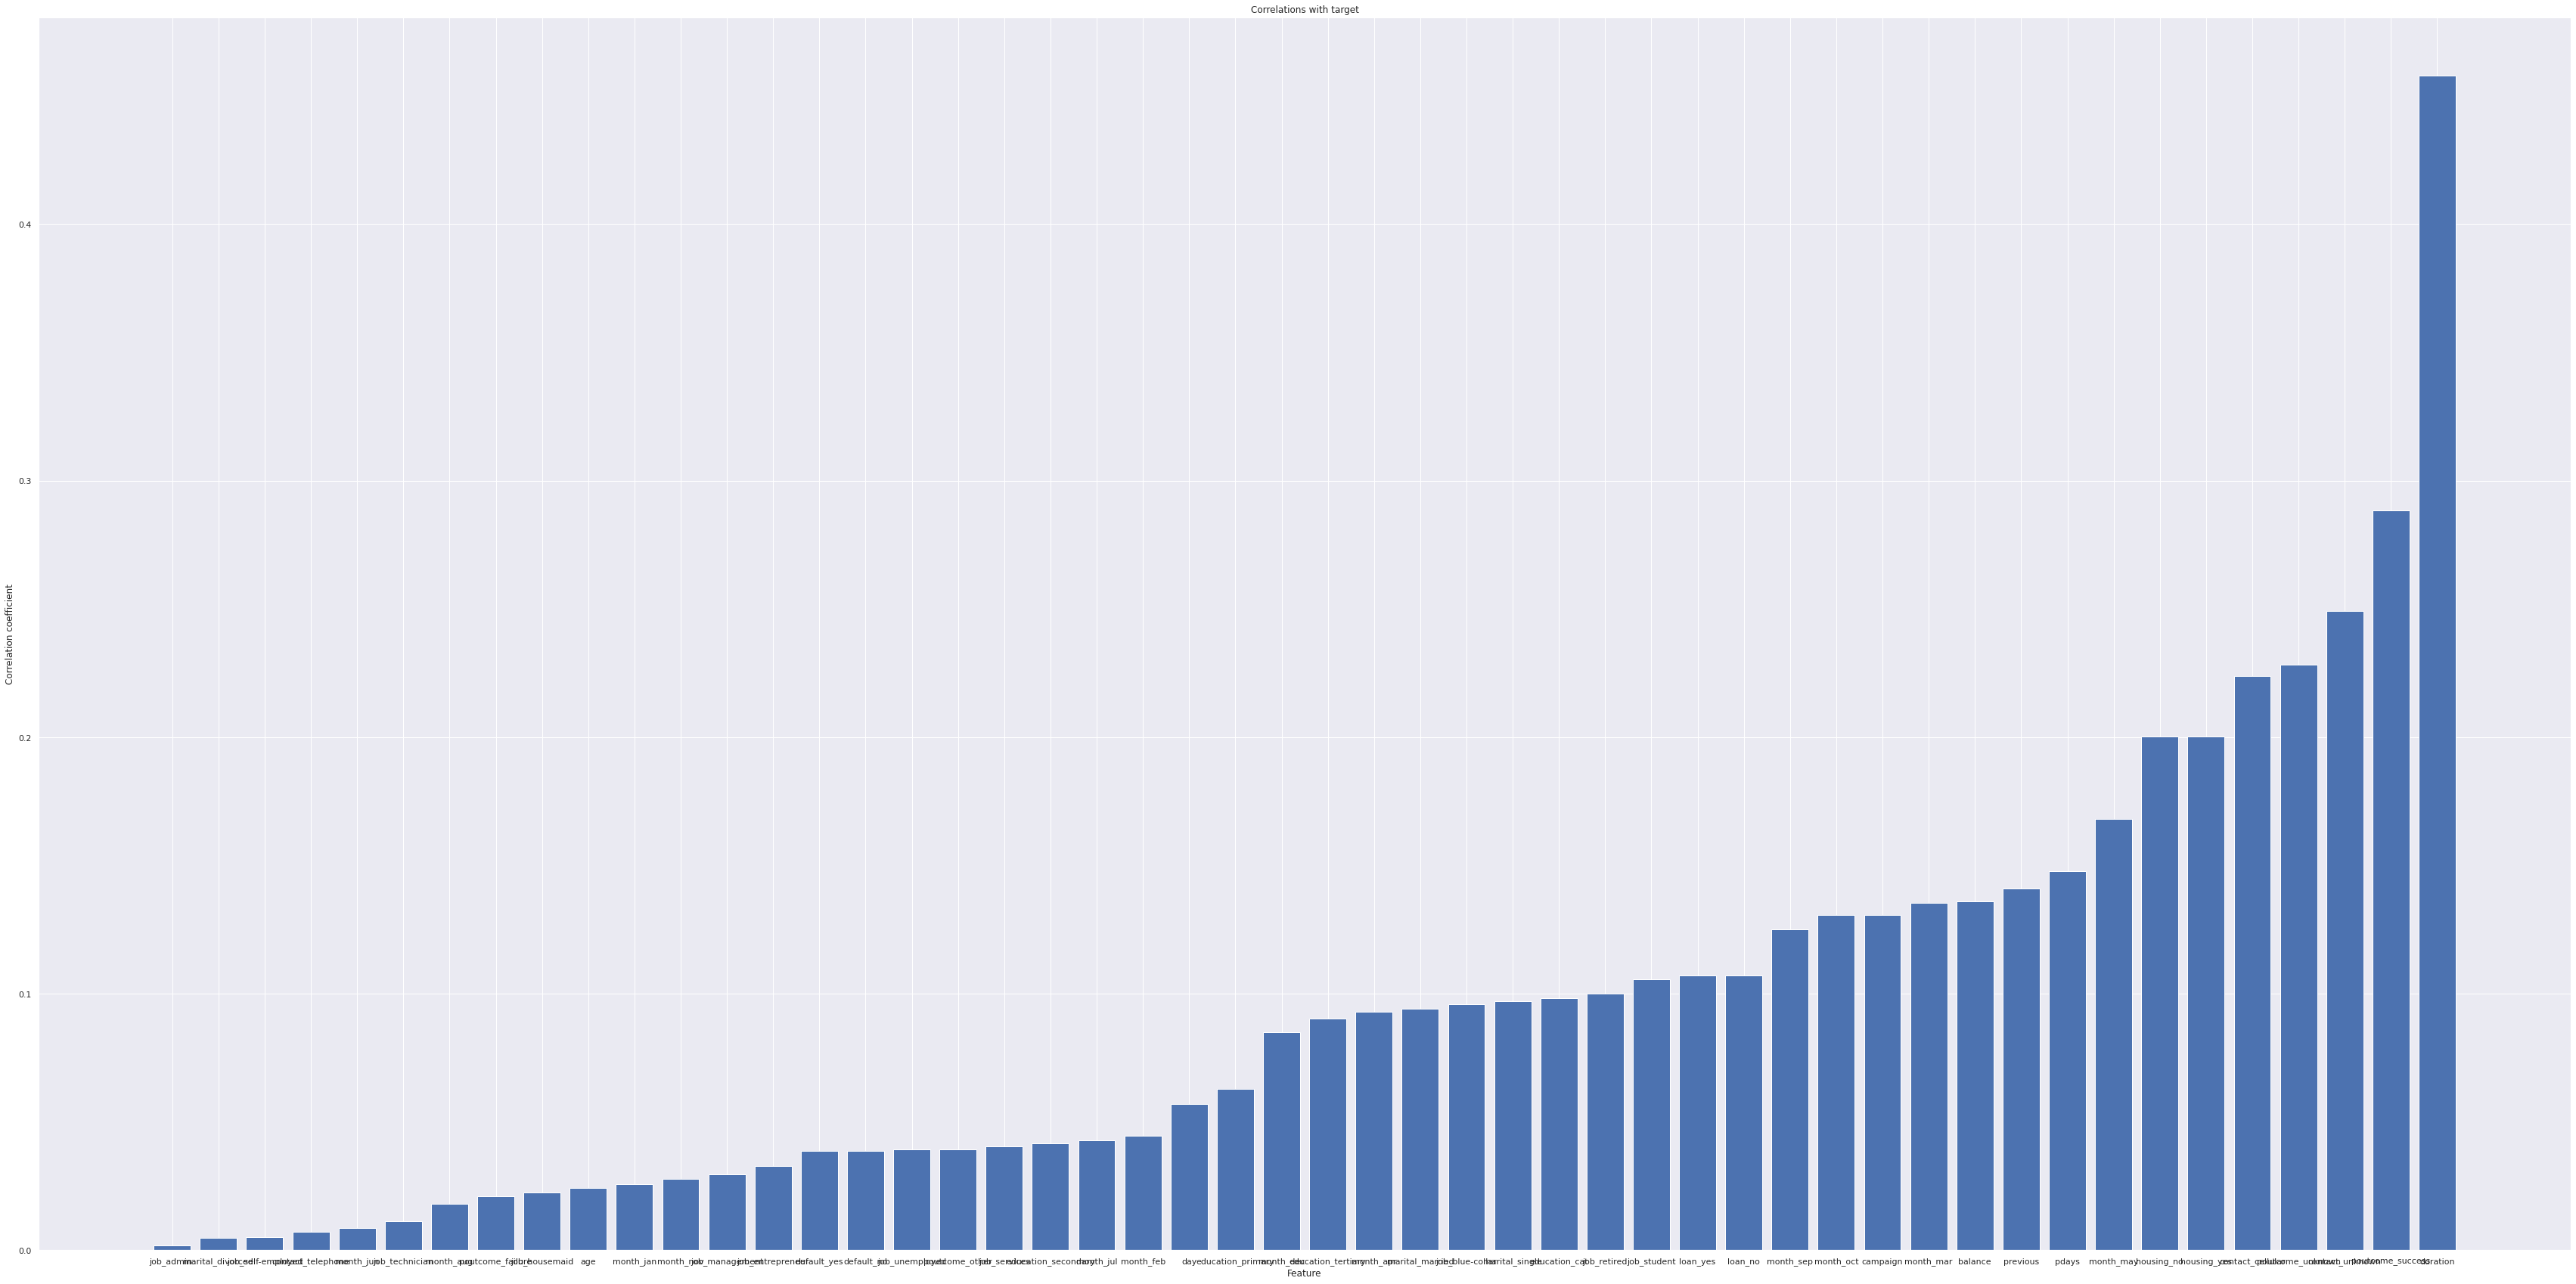

In [63]:
#calculate the correlation modulus
corr_with_target = dummies_df.corr()['deposit'].abs().sort_values()
#removing the correlation of the target variable with itself
corr_with_target = corr_with_target.drop('deposit')
#building a bar chart of correlations
fig, ax = plt.subplots(figsize=(60, 30)) #figure + coordinate plane
ax.bar(corr_with_target.index, corr_with_target.values) #bar chart
ax.set_title('Correlations with target') #chart title
ax.set_xlabel('Feature') #x-axis name
ax.set_ylabel('Сorrelation coefficient') #y-axis name

### Dataset Splitting

In [64]:
df = dummies_df.copy()

In [65]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [66]:
#the shapes of the obtained samples
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (6770, 50)
Test shape: (3335, 50)


In [67]:
round(y_test.mean(),2)

0.46

### SelectKBest

In [68]:
# using SelectKBest, we will select the 15 most relevant features
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)

X_new = selector.transform(X)
print(X_new.shape)

X.columns[selector.get_support(indices=True)]

vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)

(10105, 15)
['balance', 'duration', 'campaign', 'pdays', 'previous', 'housing_no', 'housing_yes', 'contact_cellular', 'contact_unknown', 'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown']


### Minmaxscaler Normalization

In [69]:
# data normalization with minmaxsxaler
X_test_scaled = preprocessing.MinMaxScaler().fit_transform(X_test[vector_names])
X_train_scaled = preprocessing.MinMaxScaler().fit_transform(X_train[vector_names])
X_test_scaled[:,0].mean()

0.45901814327601437

## Part 4. Classification: Logistic Regression and Decision Trees


### Logistic Regression

In [70]:
# learning logistic regression and calculating quality metrics

In [71]:
#create an object of class logistic regression
log_reg = linear_model.LogisticRegression(
    solver='sag', #optimization algorithm
    random_state=42, #random number generator
    max_iter=1000 #number of iterations for convergence
)
#train the model by minimizing logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='sag')

In [72]:
#making a prediction for the training set
y_train_pred = log_reg.predict(X_train_scaled)
#making a prediction for the test sample
y_test_pred = log_reg.predict(X_test_scaled)
#output classification metrics report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1790
           1       0.79      0.80      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



###  Decision Tree Classifier

In [73]:
# learning decision trees, adjusting the maximum depth

In [74]:
#create an object of class DecisionTreeClassifier
dt_df = tree.DecisionTreeClassifier(
    criterion='entropy', #informative criterion
    max_depth=8, #maximum tree depth
    random_state=42 #random number generator
)

#train the model 
dt_df.fit(X_train_scaled, y_train)
 
#making a class prediction
y_train_pred = dt_df.predict(X_train_scaled)
y_test_pred = dt_df.predict(X_test_scaled)
#outputting a metrics report
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3634
           1       0.83      0.81      0.82      3136

    accuracy                           0.83      6770
   macro avg       0.83      0.83      0.83      6770
weighted avg       0.83      0.83      0.83      6770

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1790
           1       0.77      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### GridSearch

In [75]:
# selection of optimal parameters using gridsearch

In [76]:
param_grid = [{'min_samples_split': [2, 5, 7, 10],
               'max_depth':[3,5,7] } #первый словарь 
             ]

In [77]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=dt_df, 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)

In [78]:
grid_search.fit(X_train_scaled, y_train) 

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=8,
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [3, 5, 7],
                          'min_samples_split': [2, 5, 7, 10]}])

In [79]:
print("Best Parameter Values: {}".format(grid_search.best_params_))

Best Parameter Values: {'max_depth': 7, 'min_samples_split': 2}


In [80]:
print("accuracy on the test set: {:.2f}".format(grid_search.score(X_test_scaled, y_test)))

accuracy on the test set: 0.80


In [81]:
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score on test set:  {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score on test set:  0.79


## Part 5. Classification: ensembles of models and forecasting

### Random Forest Classifier

In [82]:
# random forest learning

In [83]:
df.groupby(['age', 'deposit']).size()

age  deposit
18   0           1
     1           7
19   0           2
     1          11
20   0           5
                ..
89   0           1
90   1           2
92   1           2
93   1           2
95   1           1
Length: 143, dtype: int64

In [84]:
#create an object of the random forest class
rf_df = ensemble.RandomForestClassifier(
    n_estimators=100, #number of trees
    criterion='gini', #efficiency criterion
    max_depth=10, #maximum tree depth
    min_samples_leaf=5,
    random_state=42 #random number generator
)

#train the model
rf_df.fit(X_train_scaled, y_train)

#making a class prediction
y_train_pred = rf_df.predict(X_train_scaled)
y_test_pred = rf_df.predict(X_test_scaled)
#outputting a metrics report
print(metrics.classification_report(y_train, y_train_pred))
print(metrics.classification_report(y_test, y_test_pred))
print(f'{metrics.recall_score(y_test, y_test_pred):.2f}')

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3634
           1       0.83      0.85      0.84      3136

    accuracy                           0.85      6770
   macro avg       0.85      0.85      0.85      6770
weighted avg       0.85      0.85      0.85      6770

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1790
           1       0.76      0.89      0.82      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.83      0.82      0.82      3335

0.89


### Gradient Boosting Classifier

In [85]:
# we use gradient boosting for classification and quality comparison with a random forest

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

gb = GradientBoostingClassifier(
      learning_rate = 0.05,
      min_samples_leaf = 5,
    	max_depth=5, #maximum tree depth
      n_estimators=300, #number of trees
      random_state=42 #random number generator
)

gb.fit(X_train_scaled, y_train)

y_pred = gb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1790
           1       0.76      0.88      0.82      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.83      0.82      0.82      3335



### Stacking Classifier

In [87]:
# combining algorithms already known above using stacking

In [88]:
from sklearn.ensemble import StackingClassifier

#Create a list of tuples of the form: (model name, model)
estimators = [
    ('lr', log_reg),
    ('dt', dt_df)
]

#Create an object of class stacking
st = StackingClassifier(
    estimators=estimators,
    final_estimator=gb
)
#Training the model
st.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='sag')),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=8,
                                                       random_state=42))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                              max_depth=5,
                                                              min_samples_leaf=5,
                                                              n_estimators=300,
                                                              random_state=42))

In [89]:
y_pred_stack = st.predict(X_test_scaled)
print(classification_report(y_test, y_pred_stack))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1790
           1       0.76      0.85      0.80      1545

    accuracy                           0.80      3335
   macro avg       0.81      0.81      0.80      3335
weighted avg       0.81      0.80      0.80      3335



In [90]:
print(f'{metrics.precision_score(y_test, y_pred_stack):.2f}')

0.76


### Feature Importances

In [91]:
# evaluate the features that show the most importance in the gradient boosting model

In [92]:
# feature importance
print(gb.feature_importances_)

[0.06621228 0.51683702 0.01907518 0.05583188 0.00863968 0.0265602
 0.02235612 0.00258688 0.07862168 0.02775233 0.01505047 0.02020791
 0.01593771 0.12136471 0.00296595]


In [93]:
gb.feature_importances_

array([0.06621228, 0.51683702, 0.01907518, 0.05583188, 0.00863968,
       0.0265602 , 0.02235612, 0.00258688, 0.07862168, 0.02775233,
       0.01505047, 0.02020791, 0.01593771, 0.12136471, 0.00296595])

Text(0, 0.5, 'Importances')

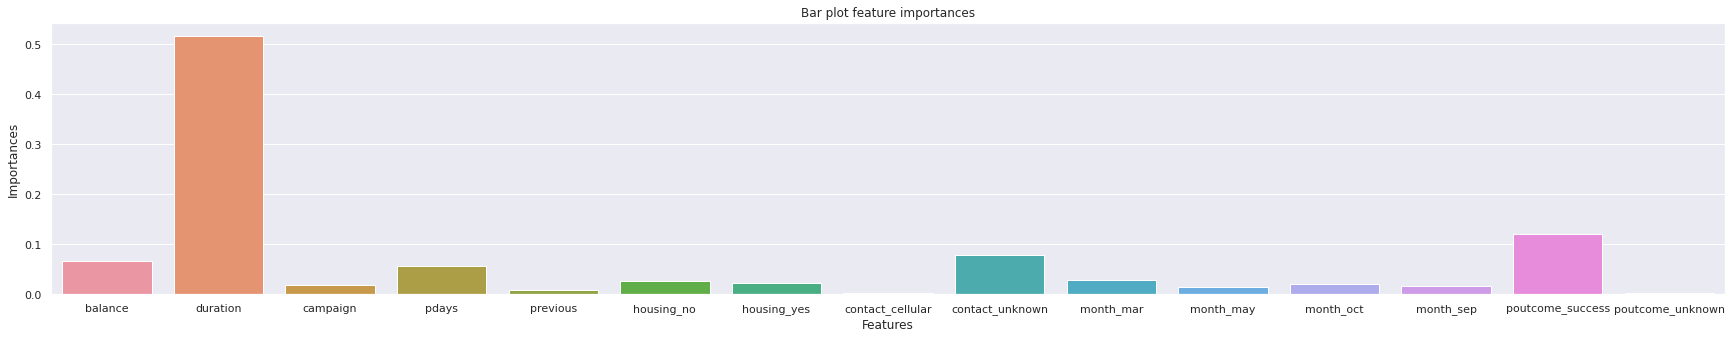

In [94]:
fig, ax = plt.subplots(figsize=(30, 5)) #shape + coordinate plane
feature = selector.get_feature_names_out() #features
feature_importances = gb.feature_importances_ #importance of features
#build a bar chart
sns.barplot(x=feature, y=feature_importances, ax=ax)
#add titles to the graph, x and y axes
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances')

### Optuna

In [95]:
# hyperparameter optimization with Optuna

In [97]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 7.6 MB/s 
     |████████████████████████████████| 209 kB 55.5 MB/s 
     |████████████████████████████████| 81 kB 10.3 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 112 kB 52.1 MB/s 
     |████████████████████████████████| 49 kB 8.1 MB/s 
     |████████████████████████████████| 147 kB 58.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=6941f538e1b0c5177de53527ef5dd5515d224480fd60c24fd0071b09c27fac02
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [98]:
import optuna

print("Optuna version: {}".format(optuna.__version__))

Optuna version: 2.10.1


In [99]:
def optuna_rf(trial):
  # define hyperparameter search spaces
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  #create a model
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42
                                          )
  #train the model
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [100]:
%%time
# create an object of study
# we can directly specify that we need to maximize the metric direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# looking for the best combination of hyperparameters n_trials times
study.optimize(optuna_rf, n_trials=20)

[I 2022-08-23 16:31:40,385] A new study created in memory with name: RandomForestClassifier
[I 2022-08-23 16:31:41,148] Trial 0 finished with value: 0.8836552048987282 and parameters: {'n_estimators': 103, 'max_depth': 26, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8836552048987282.
[I 2022-08-23 16:31:42,094] Trial 1 finished with value: 0.8525871502266688 and parameters: {'n_estimators': 146, 'max_depth': 15, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8836552048987282.
[I 2022-08-23 16:31:42,851] Trial 2 finished with value: 0.8564720613554547 and parameters: {'n_estimators': 118, 'max_depth': 18, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8836552048987282.
[I 2022-08-23 16:31:43,996] Trial 3 finished with value: 0.8594314433799278 and parameters: {'n_estimators': 177, 'max_depth': 26, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.8836552048987282.
[I 2022-08-23 16:31:44,915] Trial 4 finished with value: 0.8864239962505858 and parameters: {'n_

CPU times: user 22.4 s, sys: 117 ms, total: 22.5 s
Wall time: 22.6 s


In [101]:
# displaying the results on the training sample
print("Best Hyperparameter Values {}".format(study.best_params))
print("f1_score on training set: {:.2f}".format(study.best_value))

Best Hyperparameter Values {'n_estimators': 186, 'max_depth': 26, 'min_samples_leaf': 2}
f1_score on training set: 0.92


In [102]:
# calculate the accuracy for the test sample
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy on the test set: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score on test set: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy on the test set: 0.81
f1_score on test set: 0.81
